In [1]:
## Data frame 
import pandas as pd

import numpy as np
from patsy import dmatrices

from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.regression.linear_model import OLSResults

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from vecstack import stacking

%matplotlib inline
plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)


C:\Users\schoo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\schoo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


## Read in the Data 

In [2]:
main_df = pd.read_excel("main_data.xlsx")

In [3]:
main_df = main_df.drop(columns = "Unnamed: 0")
main_df.head(2)

,Country Name,year,Continent,Social_support,Intentional_Homicide,Graduation_Ratio,Ado_Dropped
0,Afghanistan,2008,Asia,0.450662,NaN,NaN,NaN
1,Afghanistan,2009,Asia,0.552308,NaN,NaN,NaN


In [4]:
main_df = main_df.rename(columns ={"Social support":"Social_support"})
main_df.head(4)

,Country Name,year,Continent,Social_support,Intentional_Homicide,Graduation_Ratio,Ado_Dropped
0,Afghanistan,2008,Asia,0.450662,NaN,NaN,NaN
1,Afghanistan,2009,Asia,0.552308,NaN,NaN,NaN
2,Afghanistan,2010,Asia,0.539075,NaN,NaN,NaN
3,Afghanistan,2011,Asia,0.521104,NaN,NaN,NaN


In [5]:
main_df = main_df[main_df["year"].isin([2015,2016,2017,2018,2019])]
main_df.head(5)

,Country Name,year,Continent,Social_support,Intentional_Homicide,Graduation_Ratio,Ado_Dropped
7,Afghanistan,2015,Asia,0.528597,9.975262,NaN,NaN
8,Afghanistan,2016,Asia,0.559072,6.692419,NaN,NaN
9,Afghanistan,2017,Asia,0.490880,6.800695,NaN,NaN
10,Afghanistan,2018,Asia,0.507516,6.743573,9.7769,NaN
11,Afghanistan,2019,Asia,0.419973,7.180397,NaN,NaN


In [6]:
main_df = main_df.reset_index(drop = True)

In [14]:
main_df["Graduation_Ratio"].max()

90.24088

In [13]:
main_df["Graduation_Ratio"].min()

1.48576

## Transform and make smaller

In [8]:
data_transformed = main_df

data_transformed["Intentional_Homicide_log"] = np.log(data_transformed["Intentional_Homicide"])

data_transformed.head(5)

,Country Name,year,Continent,Social_support,Intentional_Homicide,Graduation_Ratio,Ado_Dropped,Intentional_Homicide_log
0,Afghanistan,2015,Asia,0.528597,9.975262,NaN,NaN,2.300108
1,Afghanistan,2016,Asia,0.559072,6.692419,NaN,NaN,1.900975
2,Afghanistan,2017,Asia,0.490880,6.800695,NaN,NaN,1.917025
3,Afghanistan,2018,Asia,0.507516,6.743573,9.7769,NaN,1.908590
4,Afghanistan,2019,Asia,0.419973,7.180397,NaN,NaN,1.971355


In [9]:
data_transformed_Nas = data_transformed.dropna()

In [10]:
len(data_transformed_Nas)

193

## Split into years

In [11]:
data_transformed_Nas_2015 = data_transformed_Nas[data_transformed["year"] == 2015]
data_transformed_Nas_2016 = data_transformed_Nas[data_transformed["year"] == 2016]
data_transformed_Nas_2017 = data_transformed_Nas[data_transformed["year"] == 2017]
data_transformed_Nas_2018 = data_transformed_Nas[data_transformed["year"] == 2018]
data_transformed_Nas_2019 = data_transformed_Nas[data_transformed["year"] == 2019]

C:\Users\schoo\AppData\Local\Temp/ipykernel_12220/4227565750.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_transformed_Nas_2015 = data_transformed_Nas[data_transformed["year"] == 2015]
C:\Users\schoo\AppData\Local\Temp/ipykernel_12220/4227565750.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_transformed_Nas_2016 = data_transformed_Nas[data_transformed["year"] == 2016]
C:\Users\schoo\AppData\Local\Temp/ipykernel_12220/4227565750.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_transformed_Nas_2017 = data_transformed_Nas[data_transformed["year"] == 2017]
C:\Users\schoo\AppData\Local\Temp/ipykernel_12220/4227565750.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_transformed_Nas_2018 = data_transformed_Nas[data_transformed["year"] == 2018]
C:\Users\schoo\AppData\Local\Temp/ipykernel_12220/4227565750.py:5: UserWarning: Boolean 

In [12]:
data_transformed_Nas_2015 = data_transformed_Nas_2015.reset_index(drop = True)
data_transformed_Nas_2015.head(2)

,Country Name,year,Continent,Social_support,Intentional_Homicide,Graduation_Ratio,Ado_Dropped,Intentional_Homicide_log
0,Albania,2015,Europe,0.639356,2.220310,39.54295,3.05841,0.797647
1,Australia,2015,Oceania,0.951862,0.990754,58.92220,0.16973,-0.009289


In [13]:
data_transformed_Nas_2016 = data_transformed_Nas_2016.reset_index(drop = True)
data_transformed_Nas_2016.head(2)

,Country Name,year,Continent,Social_support,Intentional_Homicide,Graduation_Ratio,Ado_Dropped,Intentional_Homicide_log
0,Albania,2016,Europe,0.638411,2.742043,38.8766,5.17389,1.008703
1,Armenia,2016,Asia,0.709218,3.035764,26.0628,6.79751,1.110463


In [14]:
data_transformed_Nas_2017 = data_transformed_Nas_2017.reset_index(drop = True)
data_transformed_Nas_2017.head(2)

,Country Name,year,Continent,Social_support,Intentional_Homicide,Graduation_Ratio,Ado_Dropped,Intentional_Homicide_log
0,Albania,2017,Europe,0.637698,2.014340,43.55277,6.07264,0.700292
1,Armenia,2017,Asia,0.697925,2.454484,43.56363,7.37141,0.897917


In [15]:
data_transformed_Nas_2018 = data_transformed_Nas_2018.reset_index(drop = True)
data_transformed_Nas_2018.head(2)

,Country Name,year,Continent,Social_support,Intentional_Homicide,Graduation_Ratio,Ado_Dropped,Intentional_Homicide_log
0,Albania,2018,Europe,0.683592,2.294046,45.24585,3.05680,0.830317
1,Argentina,2018,South America,0.899912,5.367726,7.76489,0.11445,1.680404


In [16]:
data_transformed_Nas_2019 = data_transformed_Nas_2019.reset_index(drop = True)
data_transformed_Nas_2019.head(2)

,Country Name,year,Continent,Social_support,Intentional_Homicide,Graduation_Ratio,Ado_Dropped,Intentional_Homicide_log
0,Albania,2019,Europe,0.686365,2.261748,44.58341,3.69733,0.816138
1,Argentina,2019,South America,0.896371,5.155823,19.04099,0.93901,1.640127


## Models

## Model 2015

In [17]:
lm_all_fix_2015 = ols("Social_support ~ Ado_Dropped*Intentional_Homicide_log", 
                        data = data_transformed_Nas_2015).fit()

print(lm_all_fix_2015.summary())

                            OLS Regression Results                            
Dep. Variable:         Social_support   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     1.515
Date:                Wed, 20 Sep 2023   Prob (F-statistic):              0.231
Time:                        09:01:32   Log-Likelihood:                 41.496
No. Observations:                  33   AIC:                            -74.99
Df Residuals:                      29   BIC:                            -69.01
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [18]:
lm_cooksd = lm_all_fix_2015.get_influence().cooks_distance[0]

n = len(data_transformed_Nas_2015["Social_support"])

critical_d = 4/n

out_d = lm_cooksd > critical_d

print("Number of outliers:", len(data_transformed_Nas_2015.index[out_d]))

Number of outliers: 2


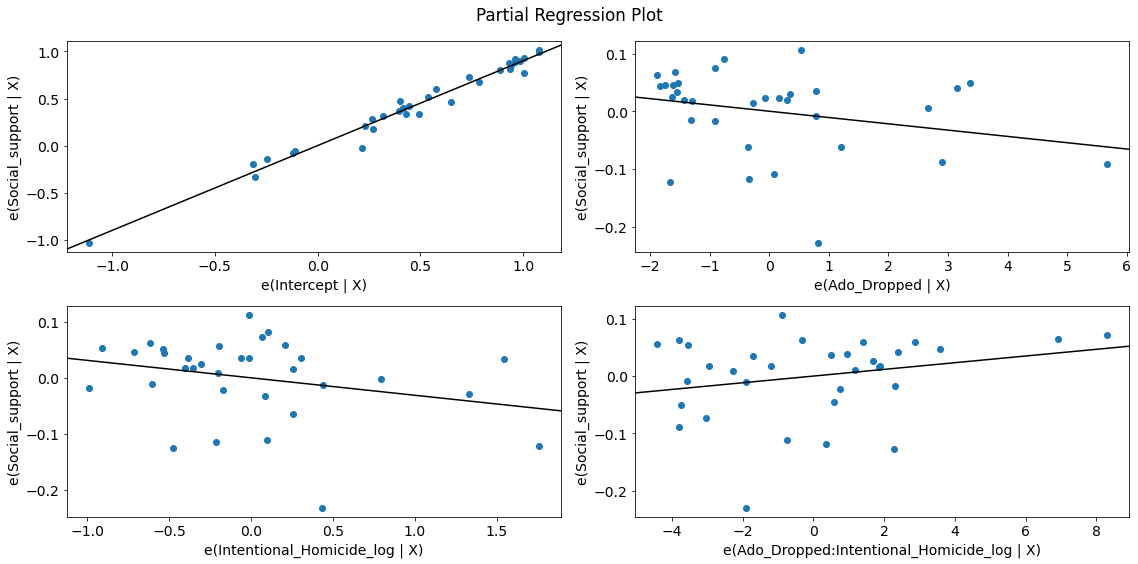

In [70]:
fig = sm.graphics.plot_partregress_grid(lm_all_fix_2015)
fig.tight_layout(pad=1.0)

In [19]:
name = ['Lagrange multiplier statistic', 'p-value']
test = sm.stats.het_breuschpagan(lm_all_fix_2015.resid, lm_all_fix_2015.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 0.9679306554703075),
 ('p-value', 0.8090111235653861)]

In [20]:
sm.stats.durbin_watson(lm_all_fix_2015.resid)

1.5340004659973827

In [21]:
y, X = dmatrices("Social_support ~ Ado_Dropped*Intentional_Homicide_log",
                 data_transformed_Nas_2015, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Feature"] = X.columns

vif.round(2)

,VIF Factor,Feature
0,2.10,Intercept
1,2.12,Ado_Dropped
2,2.73,Intentional_Homicide_log
3,4.29,Ado_Dropped:Intentional_Homicide_log


## Model 2016

In [22]:
lm_all_fix_2016 = ols("Social_support ~ Ado_Dropped*Intentional_Homicide_log", 
                        data = data_transformed_Nas_2016).fit()

print(lm_all_fix_2016.summary())

                            OLS Regression Results                            
Dep. Variable:         Social_support   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     2.675
Date:                Wed, 20 Sep 2023   Prob (F-statistic):             0.0657
Time:                        09:02:12   Log-Likelihood:                 33.059
No. Observations:                  33   AIC:                            -58.12
Df Residuals:                      29   BIC:                            -52.13
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [23]:
lm_cooksd = lm_all_fix_2016.get_influence().cooks_distance[0]

n = len(data_transformed_Nas_2016["Social_support"])

critical_d = 4/n

out_d = lm_cooksd > critical_d

print("Number of outliers:", len(data_transformed_Nas_2016.index[out_d]))

Number of outliers: 3


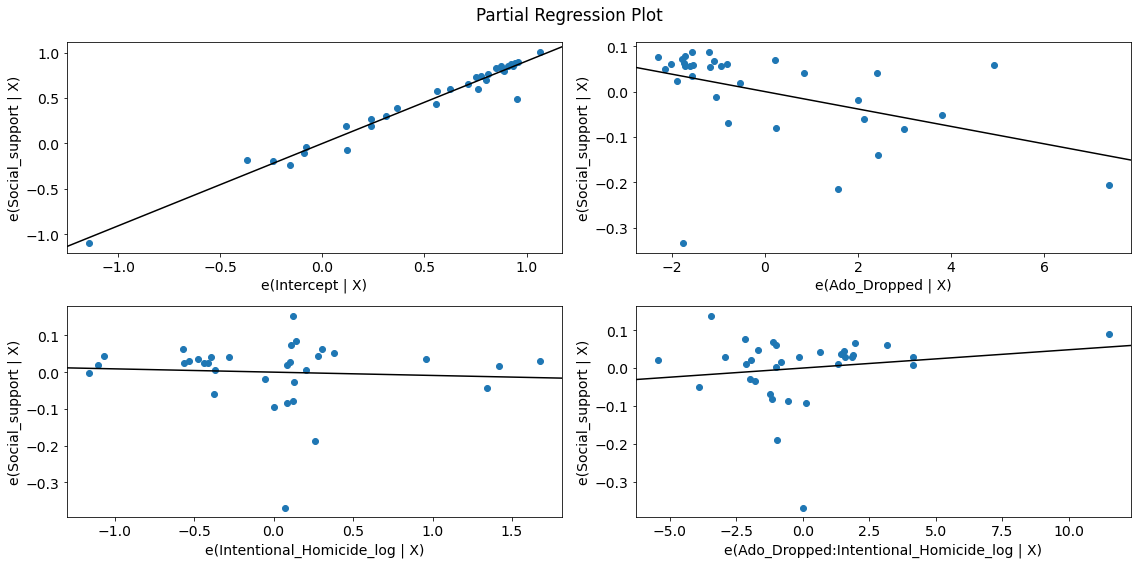

In [71]:
fig = sm.graphics.plot_partregress_grid(lm_all_fix_2016)
fig.tight_layout(pad=1.0)

In [24]:
name = ['Lagrange multiplier statistic', 'p-value']
test = sm.stats.het_breuschpagan(lm_all_fix_2015.resid, lm_all_fix_2015.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 0.9679306554703075),
 ('p-value', 0.8090111235653861)]

In [25]:
sm.stats.durbin_watson(lm_all_fix_2016.resid)

1.9271681721583434

In [27]:
y, X = dmatrices("Social_support ~ Ado_Dropped*Intentional_Homicide_log",
                 data_transformed_Nas_2016, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Feature"] = X.columns

vif.round(2)

,VIF Factor,Feature
0,1.97,Intercept
1,1.59,Ado_Dropped
2,3.01,Intentional_Homicide_log
3,3.71,Ado_Dropped:Intentional_Homicide_log


## Model 2017

In [28]:
lm_all_fix_2017 = ols("Social_support ~ Ado_Dropped*Intentional_Homicide_log", 
                        data = data_transformed_Nas_2017).fit()

print(lm_all_fix_2017.summary())

                            OLS Regression Results                            
Dep. Variable:         Social_support   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     7.763
Date:                Wed, 20 Sep 2023   Prob (F-statistic):           0.000443
Time:                        09:02:35   Log-Likelihood:                 39.444
No. Observations:                  38   AIC:                            -70.89
Df Residuals:                      34   BIC:                            -64.34
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [29]:
lm_cooksd = lm_all_fix_2017.get_influence().cooks_distance[0]

n = len(data_transformed_Nas_2017["Social_support"])

critical_d = 4/n

out_d = lm_cooksd > critical_d

print("Number of outliers:", len(data_transformed_Nas_2017.index[out_d]))

Number of outliers: 3


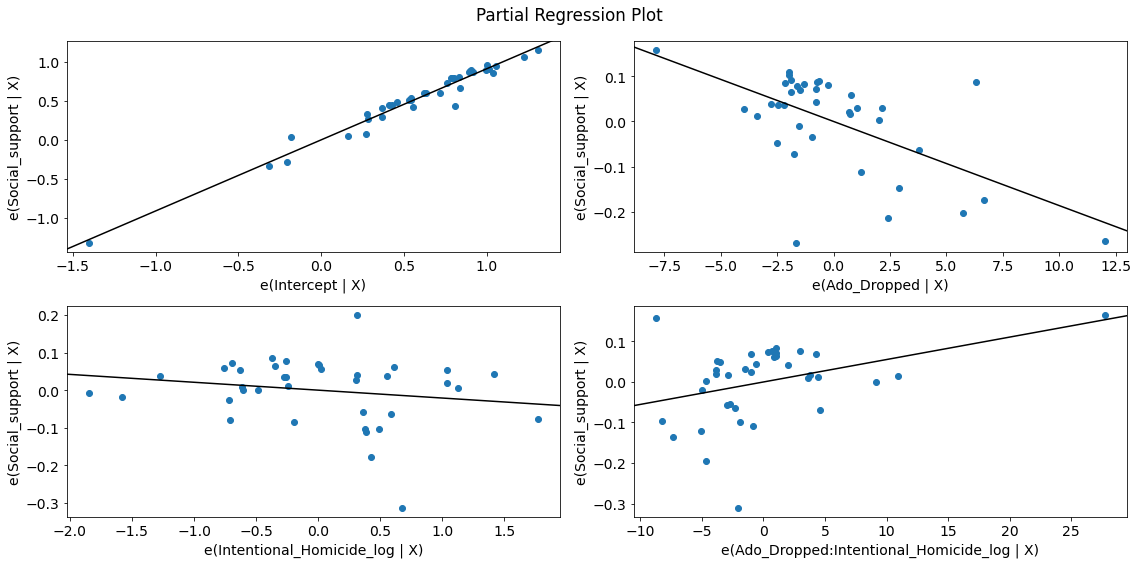

In [72]:
fig = sm.graphics.plot_partregress_grid(lm_all_fix_2017)
fig.tight_layout(pad=1.0)

In [68]:
name = ['Lagrange multiplier statistic', 'p-value']
test = sm.stats.het_breuschpagan(lm_all_fix_2017.resid, lm_all_fix_2017.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 2.1696587113735504),
 ('p-value', 0.5379493578807422)]

In [31]:
sm.stats.durbin_watson(lm_all_fix_2017.resid)

2.052317115566663

In [32]:
y, X = dmatrices("Social_support ~ Ado_Dropped*Intentional_Homicide_log",
                 data_transformed_Nas_2017, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Feature"] = X.columns

vif.round(2)

,VIF Factor,Feature
0,1.73,Intercept
1,2.81,Ado_Dropped
2,2.30,Intentional_Homicide_log
3,4.63,Ado_Dropped:Intentional_Homicide_log


## Model 2018

In [33]:
lm_all_fix_2018 = ols("Social_support ~ Ado_Dropped*Intentional_Homicide_log", 
                        data = data_transformed_Nas_2018).fit()

print(lm_all_fix_2018.summary())

                            OLS Regression Results                            
Dep. Variable:         Social_support   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     2.344
Date:                Wed, 20 Sep 2023   Prob (F-statistic):             0.0884
Time:                        09:02:50   Log-Likelihood:                 48.844
No. Observations:                  42   AIC:                            -89.69
Df Residuals:                      38   BIC:                            -82.74
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [34]:
lm_cooksd = lm_all_fix_2018.get_influence().cooks_distance[0]

n = len(data_transformed_Nas_2018["Social_support"])

critical_d = 4/n

out_d = lm_cooksd > critical_d

print("Number of outliers:", len(data_transformed_Nas_2018.index[out_d]))

Number of outliers: 3


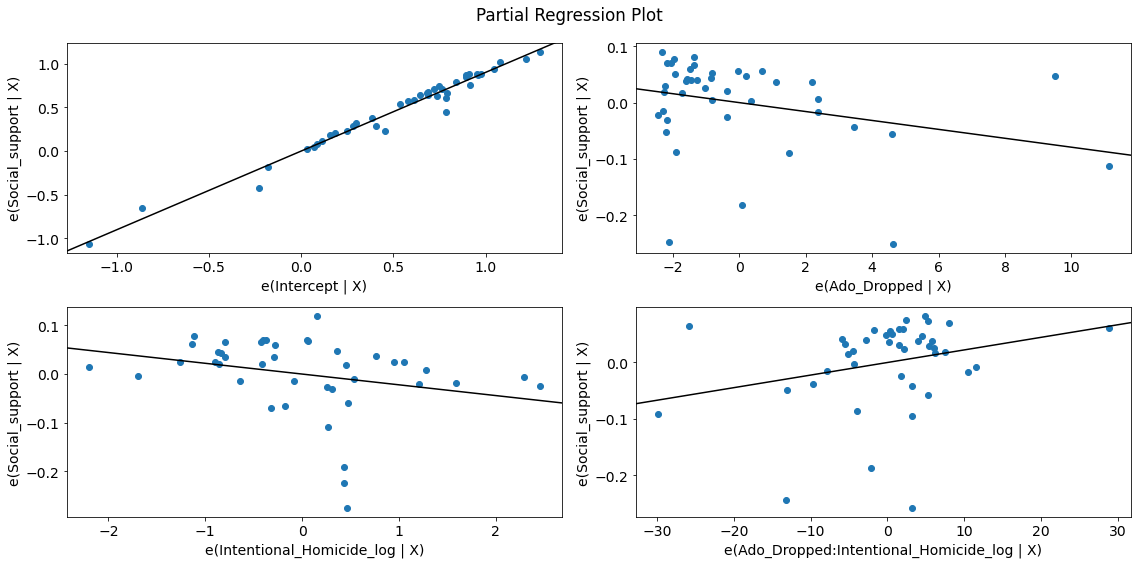

In [73]:
fig = sm.graphics.plot_partregress_grid(lm_all_fix_2018)
fig.tight_layout(pad=1.0)

In [35]:
name = ['Lagrange multiplier statistic', 'p-value']
test = sm.stats.het_breuschpagan(lm_all_fix_2015.resid, lm_all_fix_2015.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 0.9679306554703075),
 ('p-value', 0.8090111235653861)]

In [36]:
sm.stats.durbin_watson(lm_all_fix_2018.resid)

1.8966483319827878

In [37]:
y, X = dmatrices("Social_support ~ Ado_Dropped*Intentional_Homicide_log",
                 data_transformed_Nas_2018, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Feature"] = X.columns

vif.round(2)

,VIF Factor,Feature
0,1.91,Intercept
1,5.13,Ado_Dropped
2,1.60,Intentional_Homicide_log
3,6.03,Ado_Dropped:Intentional_Homicide_log


## Predicting start

In [38]:
predictions_2015 = lm_all_fix_2015.predict(data_transformed_Nas_2019) 
predictions_2016 = lm_all_fix_2016.predict(data_transformed_Nas_2019) 
predictions_2017 = lm_all_fix_2017.predict(data_transformed_Nas_2019) 
predictions_2018 = lm_all_fix_2018.predict(data_transformed_Nas_2019) 

In [39]:
data_transformed_Nas_2019["Predictions_2015"] = predictions_2015
data_transformed_Nas_2019["Predictions_2016"] = predictions_2016
data_transformed_Nas_2019["Predictions_2017"] = predictions_2017
data_transformed_Nas_2019["Predictions_2018"] = predictions_2018

In [40]:
data_transformed_Nas_2019["Predictions_Estimate"] = (data_transformed_Nas_2019["Predictions_2015"] +
                                                     data_transformed_Nas_2019["Predictions_2016"] + 
                                                     data_transformed_Nas_2019["Predictions_2017"] + 
                                                     data_transformed_Nas_2019["Predictions_2018"]) / 4

In [41]:
## 2015

SS_RES = sum((data_transformed_Nas_2019["Social_support"] - 
         data_transformed_Nas_2019["Predictions_2015"])**2)

SS_TOT = sum((data_transformed_Nas_2019["Social_support"] - 
         np.mean(data_transformed_Nas_2019["Social_support"]))**2)

1 - (SS_RES / SS_TOT)

0.0859509129353695

In [42]:
## 2016

SS_RES = sum((data_transformed_Nas_2019["Social_support"] - 
         data_transformed_Nas_2019["Predictions_2016"])**2)

SS_TOT = sum((data_transformed_Nas_2019["Social_support"] - 
         np.mean(data_transformed_Nas_2019["Social_support"]))**2)

1 - (SS_RES / SS_TOT)

-0.30451348000755907

In [43]:
## 2017

SS_RES = sum((data_transformed_Nas_2019["Social_support"] - 
         data_transformed_Nas_2019["Predictions_2017"])**2)

SS_TOT = sum((data_transformed_Nas_2019["Social_support"] - 
         np.mean(data_transformed_Nas_2019["Social_support"]))**2)

1 - (SS_RES / SS_TOT)

-0.2204308631421521

In [44]:
## 2018

SS_RES = sum((data_transformed_Nas_2019["Social_support"] - 
         data_transformed_Nas_2019["Predictions_2018"])**2)

SS_TOT = sum((data_transformed_Nas_2019["Social_support"] - 
         np.mean(data_transformed_Nas_2019["Social_support"]))**2)

1 - (SS_RES / SS_TOT)

0.13067422006177598

In [45]:
## Estimate

SS_RES = sum((data_transformed_Nas_2019["Social_support"] - 
         data_transformed_Nas_2019["Predictions_Estimate"])**2)

SS_TOT = sum((data_transformed_Nas_2019["Social_support"] - 
         np.mean(data_transformed_Nas_2019["Social_support"]))**2)

1 - (SS_RES / SS_TOT)

-0.00955614316792297

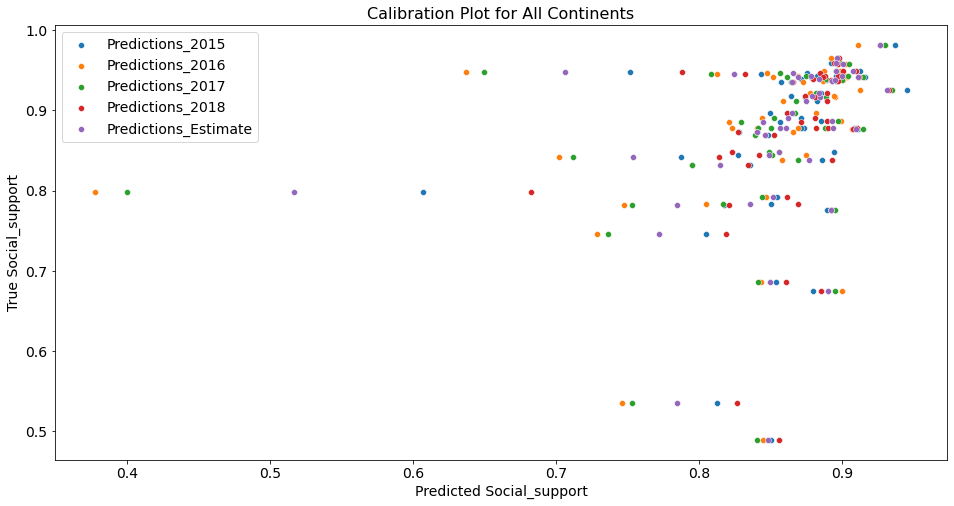

In [74]:
ax1 = sns.scatterplot(
                 data = data_transformed_Nas_2019,
                    y = "Social_support", 
                    x = "Predictions_2015")

ax2 = sns.scatterplot( 
                 data = data_transformed_Nas_2019,
                    y = "Social_support", 
                    x = "Predictions_2016")

ax3 = sns.scatterplot( 
                 data = data_transformed_Nas_2019,
                    y = "Social_support", 
                    x = "Predictions_2017")


ax4 = sns.scatterplot( 
                 data = data_transformed_Nas_2019,
                    y = "Social_support", 
                    x = "Predictions_2018")


ax5 = sns.scatterplot( 
                 data = data_transformed_Nas_2019,
                    y = "Social_support", 
                    x = "Predictions_Estimate")

plt.legend(labels = ['Predictions_2015', 
                     'Predictions_2016', 
                     'Predictions_2017', 
                     'Predictions_2018', 
                     'Predictions_Estimate'])

ax1.set_ylabel("True Social_support", fontsize = 14)
ax1.set_xlabel("Predicted Social_support", fontsize = 14)

ax1.set_title("Calibration Plot for All Continents", fontsize = 16)

#plt.savefig('ax1.png')